<a href="https://colab.research.google.com/github/azganushpoghosyan/fidap/blob/main/Exploring_github_repositories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data, Introduction

GitHub is how people build software and is home to the largest community of open source developers in the world. Over 12 million people contributed to 31 millions of projects on GitHub since 2008 ([Fidap](https://app.fidap.com/catalog/datasets/300/tables?tab=overview)).

There are two datasets in Fidap dedicated to Github. The first one [Github](https://app.fidap.com/catalog/datasets/300/tables) contains general information about repositories (languages, licenses, files, commits, etc.) and the second one [Github Dbt](https://app.fidap.com/catalog/datasets/557/tables?tab=tables) has data about repositories' daily stars, pull requests and issues. 

In this analysis we will combine these two datasets and will explore github repositories from different perspectives. 

Let's instantiate api connection and import necessary libraries for the analysis.

In [ ]:
!pip install --upgrade fidap

from fidap import fidap_client
fidap = fidap_client(api_key='e5bb3c8567d14dd28923d1cdbe0560a4')

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

#Exploratory Data Analysis

First let's look at the github stars data and try to find out the most popular ones by yearly, monthly and weekly stars.

In [195]:
df_top10_yearly = fidap.sql("""
SELECT a.repo_name, a.stars_7d, a.stars_30d, a.stars_1y, b.language
FROM fidap-301014.github_dbt.repos AS a
LEFT JOIN bigquery-public-data.github_repos.languages AS b
ON a.repo_name = b.repo_name
ORDER BY stars_1y DESC
LIMIT 10
""").fillna(0)

In [140]:
fig_top10_yearly = px.bar(df_top10_yearly, x='repo_name', y='stars_1y', color_discrete_sequence = ['#1ABC9C'], title = 
                          'Top 10 repositories by yearly stars', text = 'stars_1y')
fig_top10_yearly.update_xaxes(title = 'Repository')
fig_top10_yearly.update_yaxes(title = 'Stars in the previous 1 year')
fig_top10_yearly.show()

We can see that repositories related to learning programming are among the top ones by yearly stars.

In [190]:
df_top10_monthly = fidap.sql("""
SELECT a.repo_name, a.stars_7d, a.stars_30d, a.stars_1y, b.language
FROM fidap-301014.github_dbt.repos AS a
LEFT JOIN bigquery-public-data.github_repos.languages AS b
ON a.repo_name = b.repo_name
ORDER BY stars_30d DESC
LIMIT 10
""").fillna(0)

In [191]:
fig_top10_monthly = px.bar(df_top10_monthly, x='repo_name', y='stars_30d', color_discrete_sequence = ['#FFC300'], title = 
                          'Top 10 repositories by monthly stars', text = 'stars_30d')
fig_top10_monthly.update_xaxes(title = 'Repository')
fig_top10_monthly.update_yaxes(title = 'Stars in the previous 1 month')
fig_top10_monthly.show()

In [143]:
df_top10_weekly = fidap.sql("""
SELECT a.repo_name, a.stars_7d, a.stars_30d, a.stars_1y, b.language
FROM fidap-301014.github_dbt.repos AS a
LEFT JOIN bigquery-public-data.github_repos.languages AS b
ON a.repo_name = b.repo_name
ORDER BY stars_7d DESC
LIMIT 10
""").fillna(0)

In [192]:
fig_top10_weekly = px.bar(df_top10_weekly, x='repo_name', y='stars_7d', color_discrete_sequence = ['#34495E'], title = 
                          'Top 10 repositories by weekly stars', text = 'stars_7d')
fig_top10_weekly.update_xaxes(title = 'Repository')
fig_top10_weekly.update_yaxes(title = 'Stars in the previous 1 week')
fig_top10_weekly.show()

Among the weekly and monthly top repositories we can find several ones providing framework for building applications. Among them are ***flutter/flutter***, ***tauri-apps/tauri***. 
We can see that some repos like ***jwasham/coding-interview-university***, ***kamranahmedse/developer-roadmap	735*** that were among the top yearly repositories are still popular (month, week). However, ***public-apis/public-apis*** is an absolute leader:  it is the #1 repo by weekly and monthly, and #2 by yearly stars. 

Let's get the top 3000 repos by monthly stars, and see how weekly, monthly and yearly stars are correlated to each other. 

In [145]:
df = fidap.sql("""
SELECT a.repo_name, a.stars_7d, a.stars_30d, a.stars_1y, b.language
FROM fidap-301014.github_dbt.repos AS a
LEFT JOIN bigquery-public-data.github_repos.languages AS b
ON a.repo_name = b.repo_name
ORDER BY stars_30d DESC
LIMIT 3000
""").fillna(0)

In [146]:
fig = px.scatter(df, x=df['stars_30d'], y=df['stars_1y'], size=df['stars_7d'], 
                 hover_name=df['repo_name'], color_discrete_sequence = ['#0E6655'])
fig.update_xaxes(title = 'Stars in the previous 1 month')
fig.update_yaxes(title = 'Stars in the previous 1 year')
fig.show()

In this bubble chart we have monthly stars on the x and yearly ones on the y axis. The size of the bubble shows the number of weekly stars a repo has. 

We can see that some repos like ***ant-design/ant-design*** are very popular by yearly stars, however, their monthly and weekly stars are quite low. This is an indicator that the interest towards this repository has decreased  recently.

There are repositories that have rising popularity: they are among the top ones by monthly as well as weekly stars, and the number of their weekly stars is very close to the monthly number. One of them is  [jpochyla/psst](https://github.com/jpochyla/psst), a fast and multiplatform Spotify client with native GUI.

There are repositories like ***mvt-project/mvt***, or ***mrpond/BlockTheSpot*** that were among the top ones by monthly stars, however, their popularity has dropped really quickly, as the numbe of their weekly stars is really low.

Let's remove repos with more than 4K monthly and more than 30K yearly stars to see the picture in case of average and low star repositories. 

In [147]:
df1 = df[df['stars_30d']<4000][df['stars_1y']<30000]
fig1 = px.scatter(df1, x=df1['stars_30d'], y=df1['stars_1y'], size=df1['stars_7d'], 
                 hover_name=df1['repo_name'], color_discrete_sequence = ['#1F618D'])
fig1.update_xaxes(title = 'Stars in the previous 1 month')
fig1.update_yaxes(title = 'Stars in the previous 1 year')
fig1.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



We basically see an organic correlation between monthly and yearly stars.  At the same time there are lots of repos that have almost equal number of yearly and monthly stars. We can assume that these are relatively new repos and they just get popular, among them are ***localstack/localstack***, ***jlongster/absurd-sql***, etc. 

#Cluster repositories

Let's try to cluster github repos by popularity in a more systematic way, using Kmeans algorithm.

We will choose the three numeric variables we are interested in: weekly, monthly, yearly stars, and then will fit a kmeans model with 6 clusters on this data.

In [148]:
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [149]:
X = df[['stars_7d', 'stars_30d', 'stars_1y']]
X_scaled = StandardScaler().fit_transform(X)

We will calculate ***Within-Cluster-Sum of Squared Errors (WSS)*** for different numbers of clusters and will choose the one in case of which WSS starts diminishing. 

In [150]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

<function matplotlib.pyplot.show>

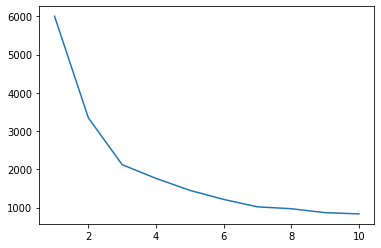

In [151]:
wss_df = pd.DataFrame(data = {'wss': calculate_WSS(X_scaled, 10), 'k': range(1, 11)})
plt.plot(wss_df['k'], wss_df['wss'])
plt.show

We will create instantiate kmeans model with 6 clusters.

In [188]:
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(X_scaled)
df['cluster'] = y_kmeans.astype(str)

Let's add the cluster column to our original dataset, and visualize the results

In [189]:
fig2 = px.scatter(df, x=df['stars_30d'], y=df['stars_1y'], size=df['stars_7d'], color = df['cluster'],
                 hover_name=df['repo_name'], 
                 title = 'Github repositories clustering by weekly, monthly and yearly stars')
fig2.update_xaxes(title = 'Stars in the previous 1 month')
fig2.update_yaxes(title ='Stars in the previous 1 year')
fig2.show()

So, we have 6 clusters. Let's understand their characteristics.

Cluster 2 includes only the repos ***public-apis/public-apis***, ***jpochyla/psst*** and ***NvChad/NvChad***. This cluster is the most popular one, even though the last two don't have many yearly stars, however, with their monthly and weekly stars they are already promising.

Cluster 3 also includes relatively popoular libraries by yearly and monthly stars, however some of them have quite low weekly stars. So, this cluster can be named as just 'popular'

Cluster 1 includes relatively new repos, that have almost equal number of yearly and monthly stars, and they have been quite popular in the week. So, this cluster can be called 'rising stars'.

Finally, clusters 5, 0 and 4 have quite similar behavior. They include either new repos that have not been popular so far, or repos that have very proportional number of monthly and yearly stars. 

#Eplore languages

In our dataset we have information about the languages associcated to repos. However, this information is not available for all repos. Let's filter only the repositories containing this data and try to understand which languages have been popular in github in the previous month.

In [154]:
df_language = fidap.sql("""
SELECT a.repo_name, a.stars_30d, b.language
FROM fidap-301014.github_dbt.repos AS a
LEFT JOIN bigquery-public-data.github_repos.languages AS b
ON a.repo_name = b.repo_name
WHERE ARRAY_LENGTH(language) != 0 
ORDER BY stars_30d DESC
LIMIT 3000
""").fillna(0)

In [155]:
df_language.head(3)

,repo_name,stars_30d,language
0,flutter/flutter,3810,"[{'name': 'Batchfile', 'bytes': 13960}, {'name': 'C', 'bytes': 3430}, {'name': 'C++', 'bytes': 62881}, {'name': 'CMake', 'bytes': 34530}, {'name': 'CSS', 'bytes': 4483}, {'name': 'Dart', 'bytes': 44258923}, {'name': 'Dockerfile', 'bytes': 4945}, {'name': 'HTML', 'bytes': 17253}, {'name': 'Java', 'bytes': 82359}, {'name': 'JavaScript', 'bytes': 4051}, {'name': 'Kotlin', 'bytes': 8640}, {'name': 'Objective-C', 'bytes': 80030}, {'name': 'PowerShell', 'bytes': 4660}, {'name': 'Ruby', 'bytes': 31311}, {'name': 'Shell', 'bytes': 47628}, {'name': 'Swift', 'bytes': 15202}]"
1,commaai/openpilot,3276,"[{'name': 'C', 'bytes': 8827806}, {'name': 'C++', 'bytes': 19163760}, {'name': 'CMake', 'bytes': 11377}, {'name': 'Cap'n Proto', 'bytes': 231756}, {'name': 'Emacs Lisp', 'bytes': 124}, {'name': 'Makefile', 'bytes': 23111}, {'name': 'Objective-C', 'bytes': 80154}, {'name': 'Python', 'bytes': 1561357}, {'name': 'QMake', 'bytes': 1569}, {'name': 'Roff', 'bytes': 758198}, {'name': 'Shell', 'bytes': 30481}]"
2,electron/electron,2321,"[{'name': 'Batchfile', 'bytes': 2750}, {'name': 'C', 'bytes': 1287}, {'name': 'C++', 'bytes': 2813291}, {'name': 'CSS', 'bytes': 2461}, {'name': 'CoffeeScript', 'bytes': 21}, {'name': 'HTML', 'bytes': 153634}, {'name': 'JavaScript', 'bytes': 533456}, {'name': 'Objective-C', 'bytes': 38022}, {'name': 'Objective-C++', 'bytes': 339153}, {'name': 'PowerShell', 'bytes': 568}, {'name': 'Python', 'bytes': 115655}, {'name': 'Shell', 'bytes': 23190}, {'name': 'TypeScript', 'bytes': 1009605}]"


Let's extract only language information from languages column and explode it. 

In [156]:
df_language['languages'] = df_language['language'].apply(lambda row: [dictionary['name'] for dictionary in row])
df_language = df_language.drop(['language'], axis = 1)

Then, let's count distinct repositories per each language and add that information to the initial dataset.

In [158]:
df_lang_agg = df_lang.groupby('languages').agg({'repo_name': 'nunique', 'stars_30d': 'sum'})
df_lang_agg.rename(columns = {'repo_name': 'repo_count'}, inplace = True)

In [160]:
languages = pd.merge(df_lang,
                     df_lang_agg,
                     on='languages',
                     how='left')
languages.rename(columns = {'stars_30d_x': 'repo_stars_30d', 'stars_30d_y': 'all_repo_stars_30d'}, inplace = True)

In [161]:
languages.head()

,repo_name,repo_stars_30d,languages,repo_count,all_repo_stars_30d
0,flutter/flutter,3810,Batchfile,357,43851
1,flutter/flutter,3810,C,544,67029
2,flutter/flutter,3810,C++,492,63840
3,flutter/flutter,3810,CMake,244,34347
4,flutter/flutter,3810,CSS,837,108249


So, we have two measures: total number of repos and total number of repo stars per each language. Let's find out how these two measures are correlated, and decide whether we can choose only one of them for our selection.  

In [197]:
fig_lang = px.scatter(languages, x = 'repo_count', y = 'all_repo_stars_30d')
fig_lang.show()

We can see that the two measures are positively correlated, so, we wil choose only the repository count per each language to decide the top 50 ones. 

In [163]:
top_languages = languages[['languages', 'repo_count']].sort_values(by = 'repo_count', ascending = False).drop_duplicates().head(50)

In [198]:
fig_lang1 = px.bar(top_languages, x='languages', y='repo_count', color = 'languages',
                   title = 'Top 50 languages by popularity in the previous 30 days')
fig_lang1.update_xaxes(title = 'Language')
fig_lang1.update_yaxes(title = 'Number of associated repositories')
fig_lang1.show()

So, based on data, the most popular 5 languages in the last month were ***Shell, JavaScript, HTML, Python*** and ***CSS***

Let's check the repositories related to these languages and separate the top 5 by monthly stars

In [165]:
repos_top_languages = languages[languages['languages'].isin(['Shell', 'JavaScript', 'HTML', 'Python', 'CSS'])]\
.groupby(['languages', 'repo_name'])['repo_stars_30d'].max().reset_index()
repos_top_languages['rank'] = (repos_top_languages.groupby(['languages'])['repo_stars_30d']
                      .rank(method='dense', ascending=False)
                      .astype(int))
repos_top_languages_ranked = repos_top_languages[repos_top_languages['rank'].isin([1, 2, 3, 4, 5])].sort_values(by = ['languages', 'rank'])

In [166]:
repos_top_languages_ranked.head()

,languages,repo_name,repo_stars_30d,rank
349,CSS,flutter/flutter,3810,1
311,CSS,electron/electron,2321,2
328,CSS,facebook/react,2035,3
792,CSS,vuejs/vue,1497,4
728,CSS,strapi/strapi,1412,5


In [167]:
fig_lang2 = px.bar(repos_top_languages_ranked, x='languages', y='repo_stars_30d', color = 'repo_name', text = 'repo_name',
                   title = 'Top 5 popular languages and top 5 repositories by monthly stars associated to them')
fig_lang2.update_xaxes(title = 'Language')
fig_lang2.update_yaxes(title = 'Repository stars in the previous 30 days')
fig_lang2.show()

We can see that a few repositories like ***flutter/flutter, electron/electron,*** or ***facebook/react*** are among top repositories for more than 4 languages.

#Explore other metrics

So far we have been concentrated on weekly, monthly and yearly stars measures for categorizing repos. 
Let's also have a look at other measures, such as pull-requests or issues and see how they are correlated to the stars.
We will need **Github Dbt** dataset's ***repo_daily*** table for this purpose.
We will extract 1 month data and will choose the repositories that were in the top 3000 list by the number of total pull requests

In [199]:
daily_df = fidap.sql("""
SELECT repo_name, SUM(total_pull_requests) AS total_pull_requests, SUM(total_stars) AS total_stars, SUM(total_issues) AS total_issues
FROM fidap-301014.github_dbt.repo_daily 
WHERE date_time >= CURRENT_DATE()-30
GROUP BY repo_name
ORDER BY total_pull_requests DESC
LIMIT 3000
""").fillna(0)

In [200]:
fig_pl = px.bar(daily_df.head(10), x = 'repo_name', y = 'total_pull_requests', hover_name='repo_name', color_discrete_sequence = ['#1ABC9C'],
                title = 'Top 10 repositories by the number of monthly pull requests', text = 'total_pull_requests')
fig_pl.update_xaxes(title = 'Repository')
fig_pl.update_yaxes(title ='Pull requests in the previous 1 month')
fig_pl.show()

So, we have the following 10 repos in the top places by the number of monthly pull_requests. Comparing with the top 10 repos by the number of monthly stars we can notice that the results are completely different. 

Let's see how correlated are total_pull requests and total_stars measures in a graph.

In [201]:
fig_corr = px.scatter(daily_df, x = 'total_pull_requests', y = 'total_stars', size = 'total_issues', hover_name='repo_name',
                      title = 'Correlation between monthly pull requests and stars')
fig_corr.update_xaxes(title = 'Pull requests')
fig_corr.update_yaxes(title = 'Stars')
fig_corr.show()

We can see that pull requests and stars don't always move together and there is no clear correlation between these measures. 

We don't see a correlation between the pull requests and issues either, which is represented in the size of bubbles in the above graph. However, let's have a look at these two measures in a separate graph

In [171]:
fig_corr1 = px.scatter(daily_df, x = 'total_pull_requests', y = 'total_issues', size = 'total_stars', hover_name='repo_name',
                       title = 'Correlation between monthly pull requests and issues')
fig_corr1.update_xaxes(title = 'Pull requests')
fig_corr.update_yaxes(title = 'Stars')
fig_corr1.show()

Except some outliers, it's obvious that the correlation between pull requests and issues is stronger, compared to the previous correlation.

Finally let's check the languages related to top repos by pull requests, and see whether we have the same poopular languages as in the case of choosing by stars. 

In [172]:
df_pl_language = fidap.sql("""
SELECT a.repo_name, a.total_pull_requests, b.language
FROM 
  (SELECT repo_name, SUM(total_pull_requests) AS total_pull_requests
   FROM fidap-301014.github_dbt.repo_daily
   WHERE date_time >= CURRENT_DATE()-30
   GROUP BY repo_name
  ) AS a
JOIN 
    (SELECT repo_name, language
     FROM bigquery-public-data.github_repos.languages 
     WHERE ARRAY_LENGTH(language) != 0
    ) AS b
ON a.repo_name = b.repo_name
ORDER BY total_pull_requests DESC
LIMIT 3000
""").fillna(0)

In [173]:
df_pl_language.head()

,repo_name,total_pull_requests,language
0,NixOS/nixpkgs,7422,"[{'name': 'Awk', 'bytes': 1090}, {'name': 'C', 'bytes': 132761}, {'name': 'C#', 'bytes': 1462}, {'name': 'C++', 'bytes': 25094}, {'name': 'CMake', 'bytes': 1245}, {'name': 'CSS', 'bytes': 749}, {'name': 'Common Lisp', 'bytes': 41259}, {'name': 'D', 'bytes': 5281}, {'name': 'Emacs Lisp', 'bytes': 22960}, {'name': 'Erlang', 'bytes': 1437}, {'name': 'Go', 'bytes': 662}, {'name': 'HCL', 'bytes': 210}, {'name': 'Haskell', 'bytes': 16880}, {'name': 'Jasmin', 'bytes': 656}, {'name': 'Java', 'bytes': 538}, {'name': 'JavaScript', 'bytes': 12513}, {'name': 'Lua', 'bytes': 74}, {'name': 'M4', 'bytes': 9030}, {'name': 'Makefile', 'bytes': 1867}, {'name': 'Meson', 'bytes': 134}, {'name': 'Nix', 'bytes': 49561401}, {'name': 'PHP', 'bytes': 224}, {'name': 'Perl', 'bytes': 171172}, {'name': 'Prolog', 'bytes': 9292}, {'name': 'PureScript', 'bytes': 170}, {'name': 'Python', 'bytes': 332908}, {'name': 'QMake', 'bytes': 1549}, {'name': 'R', 'bytes': 4323}, {'name': 'Reason', 'bytes': 182}, {'name': 'Roff', 'bytes': 2092}, {'name': 'Ruby', 'bytes': 60386}, {'name': 'Rust', 'bytes': 486}, {'name': 'Scheme', 'bytes': 105}, {'name': 'Shell', 'bytes': 877146}, {'name': 'TypeScript', 'bytes': 7549}, {'name': 'VHDL', 'bytes': 2420}, {'name': 'Vim script', 'bytes': 10838}, {'name': 'XSLT', 'bytes': 18677}, {'name': 'sed', 'bytes': 1073}]"
1,Homebrew/homebrew-core,1947,"[{'name': 'Perl', 'bytes': 628}, {'name': 'Ruby', 'bytes': 8386189}]"
2,cockroachdb/cockroach,1147,"[{'name': 'Awk', 'bytes': 1029}, {'name': 'C', 'bytes': 8848}, {'name': 'C++', 'bytes': 74789}, {'name': 'CSS', 'bytes': 34471}, {'name': 'Go', 'bytes': 7511764}, {'name': 'HCL', 'bytes': 41072}, {'name': 'HTML', 'bytes': 18016}, {'name': 'JavaScript', 'bytes': 272867}, {'name': 'Makefile', 'bytes': 19283}, {'name': 'Protocol Buffer', 'bytes': 214313}, {'name': 'Ruby', 'bytes': 2554}, {'name': 'Shell', 'bytes': 47552}, {'name': 'Smarty', 'bytes': 4831}, {'name': 'Tcl', 'bytes': 13386}, {'name': 'TypeScript', 'bytes': 240795}, {'name': 'VimL', 'bytes': 1650}, {'name': 'Yacc', 'bytes': 122618}]"
3,grafana/grafana,1098,"[{'name': 'CSS', 'bytes': 307995}, {'name': 'Dockerfile', 'bytes': 34020}, {'name': 'Go', 'bytes': 3144084}, {'name': 'HTML', 'bytes': 493818}, {'name': 'JavaScript', 'bytes': 70191}, {'name': 'Jsonnet', 'bytes': 32079}, {'name': 'Makefile', 'bytes': 6544}, {'name': 'PHP', 'bytes': 574}, {'name': 'Python', 'bytes': 34664}, {'name': 'Rich Text Format', 'bytes': 352348}, {'name': 'Shell', 'bytes': 125450}, {'name': 'Smarty', 'bytes': 2116}, {'name': 'TypeScript', 'bytes': 6366836}]"
4,flutter/flutter,1067,"[{'name': 'Batchfile', 'bytes': 13960}, {'name': 'C', 'bytes': 3430}, {'name': 'C++', 'bytes': 62881}, {'name': 'CMake', 'bytes': 34530}, {'name': 'CSS', 'bytes': 4483}, {'name': 'Dart', 'bytes': 44258923}, {'name': 'Dockerfile', 'bytes': 4945}, {'name': 'HTML', 'bytes': 17253}, {'name': 'Java', 'bytes': 82359}, {'name': 'JavaScript', 'bytes': 4051}, {'name': 'Kotlin', 'bytes': 8640}, {'name': 'Objective-C', 'bytes': 80030}, {'name': 'PowerShell', 'bytes': 4660}, {'name': 'Ruby', 'bytes': 31311}, {'name': 'Shell', 'bytes': 47628}, {'name': 'Swift', 'bytes': 15202}]"


In [174]:
df_pl_language['languages'] = df_pl_language['language'].apply(lambda row: [dictionary['name'] for dictionary in row])
df_pl_language = df_pl_language.drop(['language'], axis = 1)

In [175]:
df_pl_lang = df_pl_language.explode('languages')

In [176]:
df_pl_lang.head()

,repo_name,total_pull_requests,languages
0,NixOS/nixpkgs,7422,Awk
0,NixOS/nixpkgs,7422,C
0,NixOS/nixpkgs,7422,C#
0,NixOS/nixpkgs,7422,C++
0,NixOS/nixpkgs,7422,CMake


In [177]:
df_pl_lang_agg = df_pl_lang.groupby('languages').agg({'repo_name': 'nunique', 'total_pull_requests': 'sum'}).reset_index()
df_pl_lang_agg.rename(columns = {'repo_name': 'repo_count'}, inplace = True)

In [178]:
pl_languages = pd.merge(df_pl_lang,
                     df_pl_lang_agg,
                     on='languages',
                     how='left')
pl_languages.rename(columns = {'total_pull_requests_x': 'repo_pull_requests', 'total_pull_requests_y': 'all_repo_pull_requests'}, inplace = True)

In [179]:
pl_languages.head()

,repo_name,repo_pull_requests,languages,repo_count,all_repo_pull_requests
0,NixOS/nixpkgs,7422,Awk,35,11034
1,NixOS/nixpkgs,7422,C,562,31246
2,NixOS/nixpkgs,7422,C#,186,13892
3,NixOS/nixpkgs,7422,C++,551,31097
4,NixOS/nixpkgs,7422,CMake,280,20284


In [180]:
fig_pl_lang = px.scatter(pl_languages, x = 'repo_count', y = 'all_repo_pull_requests')
fig_pl_lang.show()

We as well we see a positive correlation between repo_count and all_repo_pull_requests, so we will choose only repo_count for deciding top languages.

In [181]:
top_pl_languages = pl_languages[['languages', 'repo_count']].sort_values(by = 'repo_count', ascending = False).drop_duplicates().head(50)

In [182]:
fig_pl_lang1 = px.bar(top_pl_languages, x='languages', y='repo_count', color = 'languages')
fig_pl_lang1.show()

As in the case of selecting by stars, selection by pull-requests gave as the same list of top languages. 

#Final notes

First, we explored github repositories using weekly, monthly and yearly stars they received. Some of the key insights from this part are that repositories related to learning programmming have been quite popular in the previous 1 year. We clustered repos by their popularity using the correlation between the number of stars in different time periods. Basically we had clusters based on the level of popularity from low to high having 2 middle groups between them and a cluster of repos as rising stars. 

Next we explored the languages associaated to these repos and found out the most popular ones in the previous 1 month. We found out that top languages were the same in case of selecting the repositories by stars or pull requests. 

Finally, we saw that pull requests and stars of repos are not always correlated to each other, and selecting top repos by the number of stars and by the number of pull requests can result iin two completely different lists. 



> 



